In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [2]:
x=[1.2,1.5,1.9,2.2,2.4,2.5,2.8,3.1,3.3,3.7,4.2,4.4]
y=[1.7,2.4,2.3,3.1,3.7,4.2,4.4,6.1,5.4,5.7,6.4,6.2]

Text(0, 0.5, 'Y')

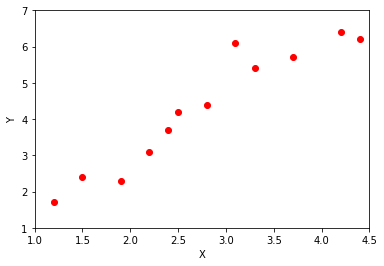

In [3]:
plt.scatter(x, y, color = 'red', label = 'data points')
plt.xlim(1,4.5)
plt.ylim(1,7)
plt.xlabel('X')
plt.ylabel('Y')


In [4]:
#x=np.array([1.1,1.3,1.5,2,2.2,2.9,3,3.2,3.2,3.7,3.9,4,4,4.1,4.5,4.9,5.1,5.3,5.9,6,6.8,7.1,7.9,8.2,8.7,9,9.5,9.6,10.3,10.5])
#y=np.array([39343,46205,37731,43525,39891,56642,60150,54445,64445,57189,63218,55794,56957,57081,61111,67938,66029,83088,81363,93940,91738,98273,101302,113812,109431,105582,116969,112635,122391,121872])


In [5]:
mean_x=round(np.mean(x),2)
mean_y=round(np.mean(y),2)

print(mean_x,mean_y)
print(len(x))
print(len(y))

2.77 4.3
12
12


In [6]:
#reg line function =: h theta x = theta 0 + theta 1 * x

# to calculate h theta x , first we need to find theta 0 and theta 1 
#theta1=len(x)
list2=[]
list3=[]

numerator=0
denominator=0
for i in range(len(x)):
    numerator +=  (x[i] - mean_x) * (y[i]- mean_y)
    
    denominator += (x[i]- mean_x) **2
    
    

theta1 = numerator/denominator
theta0 = mean_y - (theta1 * mean_x)


print('Theta1 :',theta1)
print('Theta0 :',theta0)


Theta1 : 1.5670798460288868
Theta0 : -0.04081117350001673


In [7]:
y_pred=[]

for  i in range(len(x)):
    z=theta0 + (theta1 * x[i])
    y_pred.append(z)

print(y_pred)

[1.8396846417346473, 2.3098085955433136, 2.936640533954868, 3.406764487763535, 3.7201804569693113, 3.8768884415722003, 4.347012395380866, 4.817136349189533, 5.13055231839531, 5.757384256806865, 6.5409241798213085, 6.854340149027086]


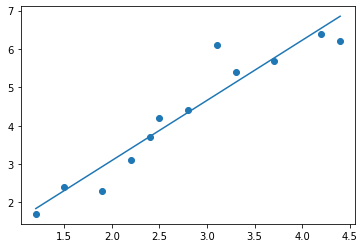

In [8]:
plt.scatter(x,y)
plt.plot(x,y_pred)


# # Cost Function

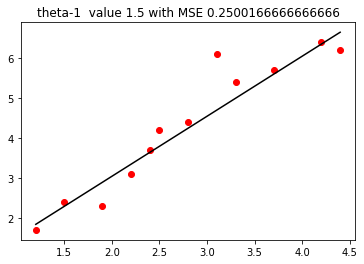

In [9]:
from sklearn.metrics import mean_squared_error as mse

# making lines for different Values of Beta 0.1, 0.8, 1.5
#theta1 = 0.1

# keeping intercept constant
#theta0 = 1.1

# to store predicted points
def func(theta1,theta0):
    
    line1 = []

    # generating predictions for every data point
    for i in range(len(x)):
        line1.append(theta0 + theta1 * x[i]  )


    plt.scatter(x,y, color = 'red')
    plt.plot(x, line1, color = 'black', label = 'line')

    MSE = mse(y, line1)

    plt.title("theta-1  value "+str(theta1)+" with MSE "+ str(MSE))

    MSE = mse(y, line1)
func(1.5,.04)

In [20]:
def Error(theta1,data):
    pred=[]
    #print(len(pred))
    theta0=1.04
    for i in range(len(x)):
        z=theta0 + theta1 * x[i]
        pred.append(z)
    
    MSE = mse(y, pred)
    return MSE
    #print(y)
    #print(pred)
    


#Error(1.5,data=x)


In [21]:
slope = [i/100 for i in range(1,250)]
#print(slope)
Cost = []
for i in slope:
    cost = Error(theta1 = i,data=x)
    Cost.append(cost)


In [22]:
# Arranging in DataFrame

Cost_table = pd.DataFrame({
'Beta' : slope,
'Cost' : Cost
})


xmin=Cost_table['Cost'].min()
Cost_table.head()


,Beta,Cost
0,0.01,12.970156
1,0.02,12.762766
2,0.03,12.557095
3,0.04,12.353144
4,0.05,12.150913


In [23]:
Cost_table[Cost_table.loc[:,'Cost']==xmin]

,Beta,Cost
121,1.22,0.360686


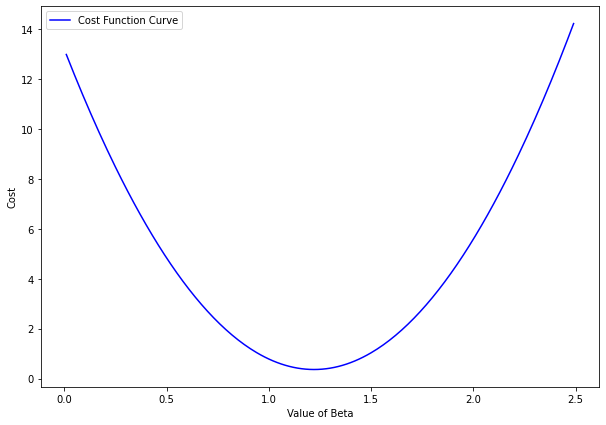

In [24]:
# plotting the cost values corresponding to every value of Beta
fig=plt.figure(figsize=(10,7))
plt.plot(Cost_table.Beta, Cost_table.Cost, color = 'blue', label = 'Cost Function Curve')
plt.xlabel('Value of Beta')
plt.ylabel('Cost')
plt.legend()